## Text Data Analysis

My first task concerns the text file `midsummer.txt` which contains the text of William Shakespeare's play *A Midsummer Night's Dream*. The play contains 5 acts, each with 2 scenes, and the task is to investigate them, and in particular to decide how positive or negative each scene is.

To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words respectively. These words come from the paper *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. 

So whilst the words are not ideal for our purpose (since they are mainly to do with product review sentiments), they still represent an interesting way to examine our scenes.



- First I will read in all three of the data files. Then I will need to split the play in 'midsummer.txt' up so that each scene can be considered individually.

In [122]:
# Import necesarry libraries
import re
import numpy as np
import matplotlib.pyplot as plt

# Read-in text files containing the text and +/- words as string type
with open('midsummer.txt','r') as file_1:
    midsummer_text = file_1.read()
with open('positive-words.txt','r') as file_2:
    positive = file_2.read()
with open('negative-words.txt','r', encoding='latin-1') as file_3:
    negative = file_3.read()
    
# Split 'midsummer_text' to create list of scenes
midsummer_scenes = re.split(r'SCENE\s\w*', midsummer_text)[1:]

# Create string of positive words by cutting unnecessary information
pos_start = re.search(r'a\+', positive)
pos_start.group(0)
positive_words = positive[pos_start.start():]

# Create string of negative words by cutting unnecessary information
neg_start = re.search(r'2\-faced', negative)
neg_start.group(0)
negative_words = negative[neg_start.start():]

In [123]:
def sent_count(text, positive, negative):
    ''' 
    Create function to count frequency of positive/negative words in a text.
    
    Keyword arguments:
        text -- the text to be analyzed (list type)
        positive -- positive words to matched (string type)
        negative -- negative words to matched (string type)
        
    The function will analyse a text by scene/chapter and return a tuple of 
    lists. These lists will contain the count of positive and negative words
    for each scene/chapter of the given text.
    '''
    # Intialize lists for word matches        
    pos_list = []
    neg_list = []
    # Loop through each scene/chapter of the text
    for scene in range(len(text)):
        for word in text[scene].split():
            # Append word count to 'pos_list' if word is in positive words
            if word.lower() in positive.split():
                pos_list.append(str(scene))
                pos_counts = sorted([(x, pos_list.count(x)) for x in set(pos_list)])
            # Append word count to 'neg_list' if word is in negative words
            elif word.lower() in negative.split():
                neg_list.append(str(scene))        
                neg_counts = sorted([(x, neg_list.count(x)) for x in set(neg_list)])
       
    # Return tuple of lists containing respective word counts
    return (pos_counts, neg_counts)

# Seperate positive/negative counts to be seperately analyzed
scene_positive_count = sent_count(midsummer_scenes, positive_words, negative_words)[0]
scene_negative_count = sent_count(midsummer_scenes, positive_words, negative_words)[1]



- I now need to invent a metric for how positive or negative a given scene is, based on how many of the words in it are in the positive/negative word lists. For instance, is a scene containing one positive and one negative word: overall positive, negative or neutral?
- So I will try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the scene. I will do this by first standardizing the data.

In [124]:
def sent_metric(positive_counts, negative_counts):
    '''
    Create function to generate customised metric for sentiment.
    
    Keyword arguments:
        positive_counts -- List of positive word count per scene (list type)
        negative_counts -- List of negative word count per scene (list type)
    
    Function takes two lists of positive/negative words per scene and creates
    a metric of sentiment per scene. The arguments are standardized to have a 
    zero mean and unit variance. The levels of sentiment will be based on how
    many standard deviations the standardized word count is from the zero mean.
    The output will be a list of these standardardized counts.
    '''
    # Convert inputs to dictionaries to analyze the ir corresponding values
    pos_dict = dict(positive_counts)
    neg_dict = dict(negative_counts)
    # Create data points by adding their positive/negative contributions
    pos_vals = [x for x in pos_dict.values()]
    neg_vals = [-x for x in neg_dict.values()]
    data_points = np.add(pos_vals, neg_vals)
    # Standardize the data points to have zero mean and unit variance
    x_bar = np.mean(data_points)
    x_sigma = np.std(data_points)
    standard_data = [(x - x_bar) for x in data_points] / x_sigma
    
    # Output the list of standardized data
    return list(standard_data)

# Define the sentiment for each scene
scene_sentiment_metric = sent_metric(scene_positive_count, scene_negative_count)

- Next will visualise the play by scene.
- Make a plot by using the sentiment metric on the y-axis with scene number on the x-axis.

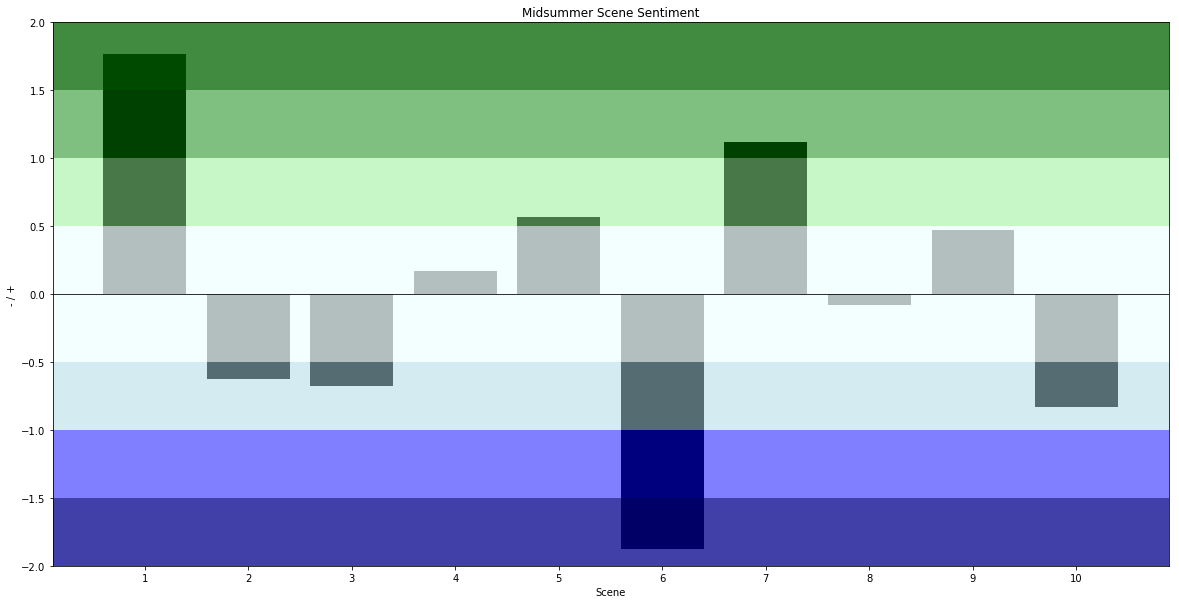

Scene 1 is very positive!
Scene 2 is slightly negative.
Scene 3 is slightly negative.
Scene 4 is neutral.
Scene 5 is slightly positive.
Scene 6 is very negative!
Scene 7 is positive.
Scene 8 is neutral.
Scene 9 is neutral.
Scene 10 is slightly negative.


In [125]:
def create_sent_plot(data, title=''):
    ''' Function to plot sentiment corresponding to each scene.'''
    plt.figure(figsize=(20, 10))
    # Contain data within 2 sigma
    plt.ylim((-2.0, 2.0))
    # Create bar chart of the data
    plt.bar([str(i) for i in range(1, 11)], height=data, color='black')
    # Create sentiment visualiztion based on number sigma the counts from mean
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axhspan(1.5, 2.0, facecolor='darkgreen', alpha=0.75)
    plt.axhspan(1.0, 1.5, facecolor='green', alpha=0.5)
    plt.axhspan(0.5, 1.0, facecolor='lightgreen', alpha=0.5)
    plt.axhspan(0.0, 0.5, facecolor='azure', alpha=0.75)
    plt.axhspan(-0.5, 0.0, facecolor='azure', alpha=0.75)
    plt.axhspan(-1.0, -0.5, facecolor='lightblue', alpha=0.5)
    plt.axhspan(-1.5, -1.0, facecolor='blue', alpha=0.5)
    plt.axhspan(-2.0, -1.5, facecolor='darkblue', alpha=0.75)
    plt.xlabel('Scene')
    plt.ylabel('- / +')
    # Title of given data
    plt.title(title)
    return plt.show()

# Visualize the scene sentiment for the Midsummer text
midsummer_sent_plot = create_sent_plot(scene_sentiment_metric, 'Midsummer Scene Sentiment')


def sent_print(xx):
    '''Function to print scene sentiment from a list of standardardized counts.'''
    for i in xx:
        if i >= 1.5:
            print("Scene " + str(xx.index(i)+1) + " is very positive!")
        elif i >= 1.0 and i < 1.5:
            print("Scene " + str(xx.index(i)+1) + " is positive.")
        elif i >= 0.5 and i < 1.0:
            print("Scene " + str(xx.index(i)+1) + " is slightly positive.")
        elif i >= -0.5 and i < 0.5:
            print("Scene " + str(xx.index(i)+1) + " is neutral.")
        elif i >= -1.0 and i < -0.5:
            print("Scene " + str(xx.index(i)+1) + " is slightly negative.")
        elif i >= -1.5 and i < 1.0:
            print("Scene " + str(xx.index(i)+1) + " is negative.")
        elif i < -1.5:
            print("Scene " + str(xx.index(i)+1) + " is very negative!")
    
# Print scene sentiment for the Midsummer text
midsummer_sent_print = sent_print(scene_sentiment_metric)

- Now I begin to analyse the speakers in the play.
- When a character starts speaking, their name appears in capitals, on its own line. I will use regular expressions to find the lines with speakers and to count their frequency of appearnece in the play.


In [126]:
# Cut parts of text that is unnecesary for analyszing speaker frequency
speaker_start = re.search(r'SCENE\:', midsummer_text)
speaker_start = midsummer_text[speaker_start.start():]

# Match speakers (All-cap, greater than 4 letters)
pattern = re.compile(r'^[:A-Z:]{4,}$', re.M)
speakers = pattern.findall(speaker_start)

# Create dictionary of speaker frequency
number_speakers = len(set(speakers))
speaker_count_dict = {x:speakers.count(x) for x in set(speakers)}

# Print speaker who speaks most frequently
speaker_count_max = max(speaker_count_dict, key=speaker_count_dict.get)
print("The speaker who speaks most frequently in the text: \n"
      + str(speaker_count_max).title())


The speaker who speaks most frequently in the text: 
Lysander


In this notebook I peformed basic text analysis by creating a metric to determine the sentiment of each scene and using regular expressions to determine speaker frequency. The functions developed in this scene could be easily used to analyse other plays in the ```.txt``` format but could also be used for other formats with minimal adaptation. 
